In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
import json
import time
from datetime import datetime

# google API key
from config import weather_api_key

# Create Random List of Coordinates

In [2]:
# Create a set of random latitude and longitude combinations.
# zip() function takes two arrays and makes pairs with the same index in their respective array - into a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# can only unzip a zipped tuple once before its removed from the computer's memory - unzip into list
coordinates

[(6.20955771902058, -94.81671282394876),
 (-30.664491389613367, -149.812842422651),
 (-43.46995880968437, 112.76500327767917),
 (84.9466014336181, 143.95888201013634),
 (-39.46046708513445, 12.070606402929371),
 (45.36083938163432, 143.29585995637916),
 (-31.786620700799105, -42.470576358918834),
 (-47.45728026368221, -111.95015315137996),
 (-18.04044225553426, -51.50018902993369),
 (67.52760517327442, 21.924507398784442),
 (3.289098839048563, -142.1985407401238),
 (30.763540648765087, 128.35143430587573),
 (13.655545418708925, 37.37281221631716),
 (-3.3875725180130587, 112.3473759594757),
 (-45.87483202729291, -35.16347290851462),
 (-9.048391486859515, 155.38251749580564),
 (32.13220024933588, 108.2891443108004),
 (44.99416300502665, -100.47033989940307),
 (-42.98461166412649, -52.126566451610174),
 (-27.74434778055226, 84.00460214757783),
 (-51.45675620963544, -0.7540401193164428),
 (72.23804536037142, -98.3021835744502),
 (-80.97704187907681, 164.36601443500524),
 (-79.0450986062392

# iterate through list of tuples and find near city to those coordinates

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

# Request data from API to get ea city's weather data

In [6]:
# pseudocode to get weather data into our dataframe

In [7]:
# initialize counters and an empty list that will hold the weather data.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
# create a for loop with the enumerate method and reference the index and the city in the list
# enumerate() adds a counter to an iterable
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
    # if the remainder of the index is = to 0 and >= 50 then set & record count are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    # replacing blank spaces in a city's name with a plus sign
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    # add a print statement to tell us the record count/set count/ and city being processed
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    # required params for this API are lat,lng & api_key
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        # list of dictionaries
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | chokurdakh
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | novikovo
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | jatai
Processing Record 10 of Set 1 | boden
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | fukue
Processing Record 13 of Set 1 | dabat
Processing Record 14 of Set 1 | pangkalanbuun
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | gizo
Processing Record 17 of Set 1 | ankang
Processing Record 18 of Set 1 | pierre
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | ushuaia
Processing Record 24 of Set 1 | pilikwe

Processing Record 40 of Set 4 | le port
Processing Record 41 of Set 4 | butaritari
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | shumikha
Processing Record 44 of Set 4 | narsaq
Processing Record 45 of Set 4 | klaksvik
Processing Record 46 of Set 4 | bongaree
Processing Record 47 of Set 4 | fomboni
Processing Record 48 of Set 4 | sandwick
Processing Record 49 of Set 4 | valparaiso
Processing Record 50 of Set 4 | farafangana
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | tutoia
Processing Record 3 of Set 5 | scottsburgh
City not found. Skipping...
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | toyooka
Processing Record 7 of Set 5 | ponta do sol
Processing Record 8 of Set 5 | mustasaari
Processing Record 9 of Set 5 | portland
Processing Record 10 of Set 5 | hami
Processing Record 11 of Set 5 | adrar
Processing Record 12 of Set 5 | batsfjord
Proce

Processing Record 23 of Set 8 | ribeira grande
Processing Record 24 of Set 8 | voyvozh
Processing Record 25 of Set 8 | makakilo city
Processing Record 26 of Set 8 | san quintin
Processing Record 27 of Set 8 | ankazobe
Processing Record 28 of Set 8 | saint-francois
Processing Record 29 of Set 8 | taltal
Processing Record 30 of Set 8 | hede
Processing Record 31 of Set 8 | cabedelo
Processing Record 32 of Set 8 | bay city
Processing Record 33 of Set 8 | knyaze-volkonskoye
Processing Record 34 of Set 8 | saint-ambroise
Processing Record 35 of Set 8 | puerto baquerizo moreno
Processing Record 36 of Set 8 | jesup
Processing Record 37 of Set 8 | pontianak
Processing Record 38 of Set 8 | pingliang
Processing Record 39 of Set 8 | bonthe
Processing Record 40 of Set 8 | ternate
Processing Record 41 of Set 8 | zhuhai
Processing Record 42 of Set 8 | bilibino
Processing Record 43 of Set 8 | rampur hat
Processing Record 44 of Set 8 | sribne
Processing Record 45 of Set 8 | palmer
Processing Record 46 

Processing Record 8 of Set 12 | shizunai
Processing Record 9 of Set 12 | languyan
Processing Record 10 of Set 12 | tamalameque
Processing Record 11 of Set 12 | moron
Processing Record 12 of Set 12 | padang
Processing Record 13 of Set 12 | repalle
Processing Record 14 of Set 12 | bandiagara
Processing Record 15 of Set 12 | college
Processing Record 16 of Set 12 | cuamba
Processing Record 17 of Set 12 | mragowo
Processing Record 18 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 19 of Set 12 | fort nelson
Processing Record 20 of Set 12 | praia
Processing Record 21 of Set 12 | kendari
Processing Record 22 of Set 12 | lubben
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | chagda
City not found. Skipping...
Processing Record 25 of Set 12 | genhe
Processing Record 26 of Set 12 | bushehr
Processing Record 27 of Set 12 | goundam
Processing Record 28 of Set 12 | winslow
Processing Record 29 of Set 12 | coquimbo
Processing Record 30 of Set 12 | ba

In [12]:
# check to see how many entries we have in city_data
print(len(city_data))

544


In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,84.16,88,53,8.01,EC,2022-02-06 20:24:52
1,Mataura,-46.1927,168.8643,47.34,74,5,1.28,NZ,2022-02-06 20:24:53
2,Albany,42.6001,-73.9662,28.31,56,57,5.01,US,2022-02-06 20:24:53
3,Chokurdakh,70.6333,147.9167,-39.57,100,91,2.21,RU,2022-02-06 20:22:23
4,Cape Town,-33.9258,18.4232,67.12,75,20,6.91,ZA,2022-02-06 20:24:52
5,Novikovo,51.1537,37.8879,29.43,92,100,10.36,RU,2022-02-06 20:24:54
6,Laguna,38.4210,-121.4238,69.44,53,0,1.99,US,2022-02-06 20:24:55
7,Rikitea,-23.1203,-134.9692,79.12,70,1,17.02,PF,2022-02-06 20:24:56
8,Jatai,-17.8814,-51.7144,80.73,69,81,3.36,BR,2022-02-06 20:20:48
9,Boden,65.8252,21.6886,26.60,97,100,8.77,SE,2022-02-06 20:24:56


In [16]:
# reorder the columns in our DF
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2022-02-06 20:24:52,-0.7393,-90.3518,84.16,88,53,8.01
1,Mataura,NZ,2022-02-06 20:24:53,-46.1927,168.8643,47.34,74,5,1.28
2,Albany,US,2022-02-06 20:24:53,42.6001,-73.9662,28.31,56,57,5.01
3,Chokurdakh,RU,2022-02-06 20:22:23,70.6333,147.9167,-39.57,100,91,2.21
4,Cape Town,ZA,2022-02-06 20:24:52,-33.9258,18.4232,67.12,75,20,6.91
...,...,...,...,...,...,...,...,...,...
539,Severo-Yeniseyskiy,RU,2022-02-06 20:41:02,60.3725,93.0408,6.42,98,100,1.72
540,Halifax,CA,2022-02-06 20:37:08,44.6453,-63.5724,20.21,72,3,2.30
541,Pineville,US,2022-02-06 20:41:02,31.3224,-92.4343,57.33,32,0,1.01
542,Pisco,PE,2022-02-06 20:41:03,-13.7000,-76.2167,71.02,83,20,10.36


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# series of scatter plots of the weather paramters vs. latitude to visualize our data

In [20]:
# Gather our columns of data from the DF
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Final Scatter will need the current date in the title, use time module
# Get today's date using strftime()
today = time.strftime("%x")
today

'02/06/22'

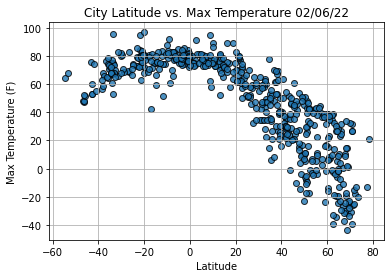

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


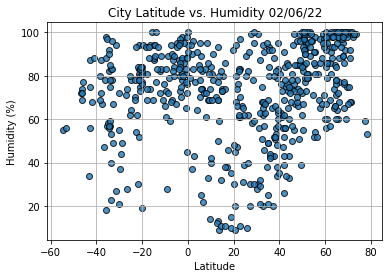

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

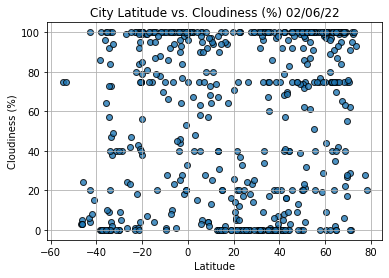

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

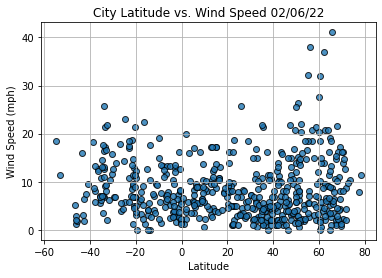

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()